In [1]:
!tesseract --version

tesseract 5.0.1
 leptonica-1.79.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 2.0.3) : libpng 1.6.37 : libtiff 4.1.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.1
 Found OpenMP 201511
 Found libarchive 3.4.0 zlib/1.2.11 liblzma/5.2.4 bz2lib/1.0.8 liblz4/1.9.2 libzstd/1.4.4
 Found libcurl/7.68.0 OpenSSL/1.1.1f zlib/1.2.11 brotli/1.0.7 libidn2/2.2.0 libpsl/0.21.0 (+libidn2/2.2.0) libssh/0.9.3/openssl/zlib nghttp2/1.40.0 librtmp/2.3


In [2]:
!tesseract --list-langs

List of available languages in "/usr/share/tesseract-ocr/5/tessdata/" (2):
eng
osd


In [3]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [4]:
!tesseract --help-oem

OCR Engine modes: (see https://tesseract-ocr.github.io/tessdoc/#40-with-lstm)
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pytesseract
import download
from extract import unsharp_mask

In [6]:
def show(image):
    plt.figure(figsize = (20,10))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.show()

https://youtu.be/Oevq2aSOs0M?t=1635

[youtube] Oevq2aSOs0M: Downloading webpage
[youtube] Oevq2aSOs0M: Downloading android player API JSON
[info] Oevq2aSOs0M: Downloading 1 format(s): 18
[download] download/Oevq2aSOs0M.mp4 has already been downloaded
[download] 100% of 616.65MiB


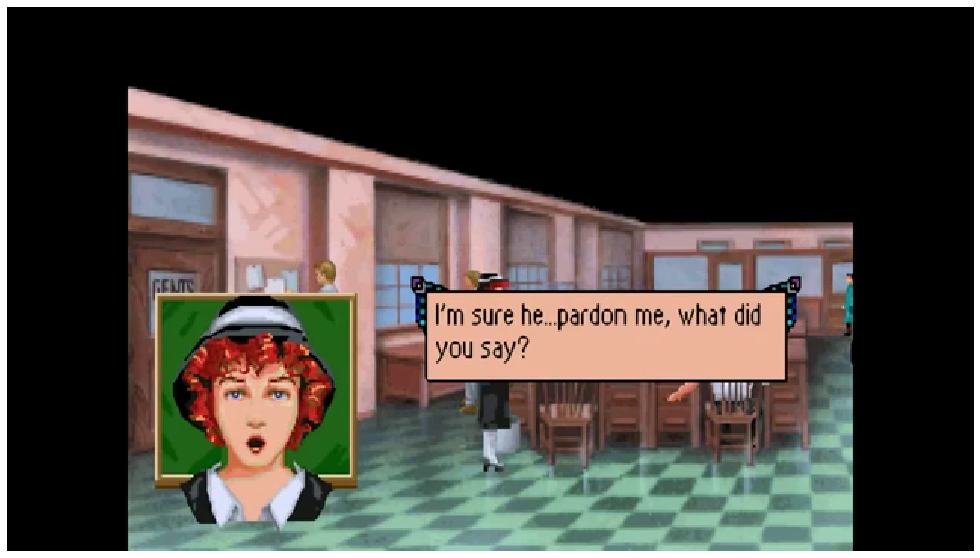

In [7]:
im = download.get_frame('Oevq2aSOs0M', 720)
show(im)

In [10]:
im.shape

(360, 640, 3)

In [8]:
print(pytesseract.image_to_string(im))

pardon me, what did a f

 



In [9]:
print(pytesseract.image_to_string(im, lang="lb"))

pardon mer what dld g 54

 



In [ ]:
unsharp = unsharp_mask(im)
show(unsharp)

In [ ]:
gray = cv2.cvtColor(unsharp, cv2.COLOR_BGR2GRAY)  # В оттенки серого
show(gray)

In [ ]:
print(pytesseract.image_to_string(gray, lang="lb"))

In [ ]:
gray_x6 = cv2.resize(gray, None, fx=6, fy=6)
blur = cv2.medianBlur(gray_x6, 3)
show(blur)

In [ ]:
print(pytesseract.image_to_string(blur, config='--psm 4'))

In [ ]:
print(pytesseract.image_to_string(blur, config='--psm 4', lang='lb'))

In [ ]:
print(pytesseract.image_to_string(blur, config='--psm 4', lang="lb"))

In [ ]:
print(pytesseract.image_to_string(blur))

In [ ]:
print(pytesseract.image_to_string(gray, config='--psm 4'))

In [ ]:
print(pytesseract.image_to_string(gray))

In [ ]:
thresh = cv2.threshold(gray_x6, 150, 255, cv2.THRESH_BINARY)[1]
show(thresh)

In [ ]:
print(pytesseract.image_to_string(thresh))

In [ ]:
thresh.shape

In [ ]:
print(pytesseract.image_to_string(thresh, lang="lb"))